# Práctica 1. Análisis exploratorio

![enigh](https://www.inegi.org.mx/img/programas/enchogares/ENIGH_ch.gif)

**1) Introducción**

La ***Encuesta Nacional de Ingresos y Gastos de los Hogares Estacional*** (ENIGH) tiene como objetivo proporcionar un panorama estadístico del comportamiento de los ingresos y gastos de los hogares en cuanto a su monto, procedencia y distribución a lo largo de un año; ofrecer información sobre las características ocupacionales y sociodemográficas de los integrantes del hogar; presentar datos sobre las características de la infraestructura de la vivienda y el equipamiento del hogar; identificar los periodos del año en el que los hogares muestran patrones en los que varía su gasto así como el ingreso, ya sea por trabajo, renta de la propiedad, transferencias, entre otros (INEGI, 2020).

Actualmente los datos que proporciona la ENIGH son utilizados por diversas instituciones, tal es el caso del Consejo Nacional de Evaluación de la Política de Desarrolo Social (CONEVAL) como un referente para la medición de la pobreza multidimensional (CONEVAL, 2015) y el caso de organizaciones como la AMAI que utiliza datos para evaluar las reglas para determinar el nivel socioeconómico conforme a su metodología (AMAI, 2020). 

Siendo la ENIGH un referente relevante en relación con temas de vivienda, gastos y egresos del hogar y población, así como otras variables, decidimos utilizar las bases de datos más recientes que aparecen en su sitio web correspondientes al año 2020. Nuestro interés es llevar a cabo una exploración de los microdatos de vivienda y características sociodemográficas de integrantes del hogar. 

Cabe mencionar que las bases de datos se consiguieron desde el sitio web de la [ENIGH](https://www.inegi.org.mx/programas/enigh/est/2020/#Microdatos) pero, conforme a lo establecido en el [Documento descripción de la base de datos](https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825199470), llevamos a cabo un proceso de unión de tablas y una limpieza de datos, así como la asignación de etiquetas en un Jupyter notebook que anexamos titulado "practica_1_limpieza_datos". 

**Fuentes**: 
* [Encuesta Nacional de Ingresos y Gastos de los Hogares Estacional, 2020](https://www.inegi.org.mx/programas/enigh/est/2020/#Microdatos)

* [Consejo Nacional de Evaluación de la Política de Desarrolo Social](https://www.coneval.org.mx/Medicion/EDP/Paginas/Datos-del-Modulo-de-Condiciones-Socioeconomicas.aspx)

* [AMAI, Inteligencia aplicada a decisiones](https://www.amai.org/NSE/index.php?queVeo=NSE2020)

**2) Objetivo general**

Explorar variables referentes a las características sociodemográficas de integrantes de hogar y de vivienda



**2.1) Objetivos específicos**

* Describir algunas variables referentes a características de la vivienda
* Analizar si existe relación entre el estrato socioeconómico de la población y características de la vivienda
* Analizar el tipo de relación entre el estrato socioeconómico de la población y características de la vivienda

Se aplicarán técnicas de estadística descriptiva para visualizar variables de tendencia central y medidas de dispersión. 

**3) Descripción del conjunto de datos**

Como se mencionó anteriormente, unimos 2 bases de datos, una corresponde a "población" y otra a "viviendas". La primera base de datos contiene un total de 181 variables y la segunda un total de 63 columnas. En este sentido, solo nos quedamos con las variables que son de nuestro interés, siendo las siguientes (19): 

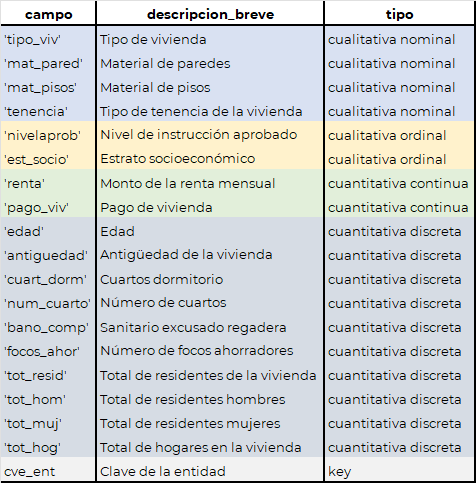

**4) Desarollo**

**4.1) Librerías necesarias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**4.2) Importar la base de datos limpia**

In [2]:
datos = pd.read_excel('enigh_limpia.xlsx')

**4.3) Comenzar la exploración de los datos**

In [3]:
datos.head(10)

,folioviv,foliohog,numren,parentesco,sexo,edad,nivelaprob,gradoaprob,edo_conyug,hor_1,...,tipo_adqui,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,factor_viv,cve_ent
0,1000540601,1,1,Jefe(a),Mujer,51,Profesional,5,6,48,...,2,1,0,1,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
1,1000540602,1,1,Jefe(a),Mujer,51,Preparatoria o bachillerato,3,5,55,...,,2,0,2,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
2,1000540602,1,2,"Hijo(a), hijo(a) consanguíneo, hijo(a) reconocido",Mujer,15,Secundaria,1,6,,...,,2,0,2,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
3,1000540603,1,1,Jefe(a),Mujer,39,Profesional,2,6,72,...,1,3,0,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
4,1000540603,1,2,Abuelo(a),Mujer,85,Secundaria,3,5,,...,1,3,0,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
5,1000540603,1,3,Hermano(a),Mujer,35,Preparatoria o bachillerato,3,6,60,...,1,3,0,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
6,1000540605,1,1,Jefe(a),Hombre,41,Preparatoria o bachillerato,3,2,60,...,1,4,1,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
7,1000540605,1,2,"Esposo(a), compañero(a), cónyuge, pareja, mari...",Mujer,44,Preparatoria o bachillerato,3,2,40,...,1,4,1,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
8,1000540605,1,3,"Hijo(a), hijo(a) consanguíneo, hijo(a) reconocido",Mujer,17,Preparatoria o bachillerato,2,6,2,...,1,4,1,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes
9,1000540605,1,4,"Hijo(a), hijo(a) consanguíneo, hijo(a) reconocido",Mujer,8,Primaria,2,,,...,1,4,1,3,1,1001,Localidades con 100 000 y más habitantes,Medio alto,1093,Aguascalientes


In [4]:
datos = datos[['folioviv', 'cve_ent', 'tipo_viv', 'nivelaprob', 'est_socio', 'tenencia', 'renta', 'pago_viv', 'edad', 'tot_resid', 'tot_hom',
              'tot_muj', 'tot_hog', 'antiguedad', 'mat_pared', 'mat_pisos', 'cuart_dorm', 'num_cuarto', 'bano_comp', 'focos_ahor']]

In [5]:
#Corregir o asignar tipo de dato a cada pd.Serie

datos = datos.astype({'folioviv':'string', 'cve_ent':'string', 'tipo_viv': 'string', 'tenencia':'string', 
                      'nivelaprob':'string', 'est_socio':'string', 'edad': 'Int64', 'tot_resid':'Int64', 'tot_hom':'Int64', 'tot_muj':'Int64',
                      'tot_hog':'Int64', 'mat_pared': 'string', 'mat_pisos':'string', 'cuart_dorm': 'Int64', 'num_cuarto':'Int64', })

In [6]:
#Corregir o asignar tipo de dato a cada pd.Serie

datos['antiguedad'] = np.floor(pd.to_numeric(datos['antiguedad'], errors='coerce')).astype('Int64')
datos['bano_comp'] = np.floor(pd.to_numeric(datos['bano_comp'], errors='coerce')).astype('Int64')
datos['focos_ahor'] = np.floor(pd.to_numeric(datos['focos_ahor'], errors='coerce')).astype('Int64')
datos['renta'] = np.floor(pd.to_numeric(datos['renta'], errors='coerce')).astype('float64')
datos['pago_viv'] = np.floor(pd.to_numeric(datos['pago_viv'], errors='coerce')).astype('float64')

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42762 entries, 0 to 42761
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    42762 non-null  string 
 1   cve_ent     42762 non-null  string 
 2   tipo_viv    42762 non-null  string 
 3   nivelaprob  40848 non-null  string 
 4   est_socio   42762 non-null  string 
 5   tenencia    42762 non-null  string 
 6   renta       5362 non-null   float64
 7   pago_viv    3880 non-null   float64
 8   edad        42762 non-null  Int64  
 9   tot_resid   42762 non-null  Int64  
 10  tot_hom     42762 non-null  Int64  
 11  tot_muj     42762 non-null  Int64  
 12  tot_hog     42762 non-null  Int64  
 13  antiguedad  36582 non-null  Int64  
 14  mat_pared   42762 non-null  string 
 15  mat_pisos   42762 non-null  string 
 16  cuart_dorm  42762 non-null  Int64  
 17  num_cuarto  42762 non-null  Int64  
 18  bano_comp   41964 non-null  Int64  
 19  focos_ahor  42631 non-nul

### **a) objetivo:** 
* Describir algunas variables referentes a características de la vivienda

In [8]:
# Generar un resumen de las medidas de tendencia central para el caso de variables cuantitativas
resumen.cuanti = datos.describe()
resumen.cuanti.round(decimals=2)

,renta,pago_viv,edad,tot_resid,tot_hom,tot_muj,tot_hog,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor
count,5362.00,3880.00,42762.00,42762.00,42762.00,42762.00,42762.00,36582.00,42762.00,42762.00,41964.00,42631.00
mean,2146.40,2926.76,32.47,4.60,2.23,2.37,1.03,21.84,2.25,3.95,0.92,5.88
std,1699.67,2784.10,21.67,2.11,1.33,1.36,0.19,15.42,0.97,1.58,0.77,5.41
min,200.00,250.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00
25%,1200.00,1500.00,14.00,3.00,1.00,1.00,1.00,10.00,2.00,3.00,0.00,3.00
50%,1700.00,2000.00,30.00,4.00,2.00,2.00,1.00,20.00,2.00,4.00,1.00,5.00
75%,2500.00,3308.75,48.00,6.00,3.00,3.00,1.00,30.00,3.00,5.00,1.00,8.00
max,22000.00,38000.00,105.00,18.00,11.00,10.00,4.00,99.00,8.00,17.00,7.00,99.00


In [58]:
#Generar la moda de todas las variables
datos.mode()

,folioviv,cve_ent,tipo_viv,nivelaprob,est_socio,tenencia,renta,pago_viv,edad,tot_resid,tot_hom,tot_muj,tot_hog,antiguedad,mat_pared,mat_pisos,cuart_dorm,num_cuarto,bano_comp,focos_ahor
0,17021570901,Chiapas,Casa independiente,Primaria,Medio bajo,Es propia,1500.0,2000.0,13,4,2,2,1,20,"Tabique, ladrillo, block, piedra, cantera, cem...",Cemento o firme,2,4,1,0


In [44]:
# Generar frecuencias y porcentajes para el caso de variables cuantitativas

#Frecuencia y porcentaje de variable cualitativa: tipo de vivienda
freq = datos.tipo_viv.value_counts()
perc = datos.tipo_viv.value_counts(normalize=True)
pd.concat([freq,perc], axis=1, keys=['frecuencia', '%'])

,frecuencia,%
Casa independiente,40771,0.95344
Departamento en edificio,974,0.022777
Vivienda en vecindad,591,0.013821
Local no construido para habitación,352,0.008232
Vivienda en cuarto de azotea,42,0.000982
No especificado,32,0.000748


In [40]:
#Frecuencia y porcentaje de variable cualitativa: nivel aprobado de educación
freq = datos.nivelaprob.value_counts()
perc = datos.nivelaprob.value_counts(normalize=True)
pd.concat([freq,perc], axis=1, keys=['frecuencia', '%'])

,frecuencia,%
Primaria,11979,0.293258
Secundaria,10724,0.262534
Preparatoria o bachillerato,6713,0.164341
Profesional,4927,0.120618
Ninguno,2608,0.063846
Preescolar,2122,0.051949
Carrera técnica o comercial,1087,0.026611
Maestría,355,0.008691
Normal,242,0.005924
Doctorado,91,0.002228


In [41]:
#Frecuencia y porcentaje de variable cualitativa: estratos socioeconómicos
freq = datos.est_socio.value_counts()
perc = datos.est_socio.value_counts(normalize=True)
pd.concat([freq,perc], axis=1, keys=['frecuencia', '%'])

,frecuencia,%
Medio bajo,22717,0.531243
Bajo,9502,0.222207
Medio alto,7777,0.181867
Alto,2766,0.064684


In [43]:
#Frecuencia y porcentaje de variable cualitativa: tenencia
freq = datos.tenencia.value_counts()
perc = datos.tenencia.value_counts(normalize=True)
pd.concat([freq,perc], axis=1, keys=['frecuencia', '%'])

,frecuencia,%
Es propia,27055,0.632688
Es rentada,5362,0.125392
Es prestada,5312,0.124222
Es propia pero la están pagando,3880,0.090735
Está intestada o en litigio,828,0.019363
Otra situación,325,0.0076


In [52]:
# Explorar el tipo de vivienda y la antiguedad
x = datos.groupby('tipo_viv')['antiguedad'].describe()
x

,count,mean,std,min,25%,50%,75%,max
tipo_viv,,,,,,,,
Casa independiente,35369.0,21.788233,15.391278,0.0,10.0,20.0,30.0,99.0
Departamento en edificio,606.0,25.013201,15.494915,1.0,12.0,25.0,34.0,99.0
Local no construido para habitación,298.0,23.063758,16.500973,1.0,12.0,20.0,30.0,90.0
No especificado,25.0,16.280000,12.879312,1.0,1.0,10.0,30.0,30.0
Vivienda en cuarto de azotea,32.0,19.500000,9.866856,1.0,10.0,20.0,26.5,40.0
Vivienda en vecindad,252.0,21.420635,17.446493,0.0,7.5,20.0,30.0,99.0


C:\Users\patri\AppData\Local\Temp/ipykernel_10920/2401019206.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media=datos.mean()


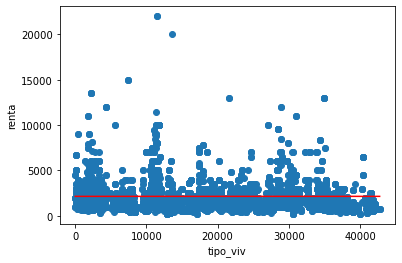

In [63]:
media=datos.mean()

plt.figure()
plt.scatter(np.arange(42762),datos['renta'])
plt.plot(np.arange(42762),media[0]*np.ones(42762),c='r')
plt.xlabel("tipo_viv")
plt.ylabel("renta")
plt.show()

C:\Users\patri\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='renta', ylabel='Density'>

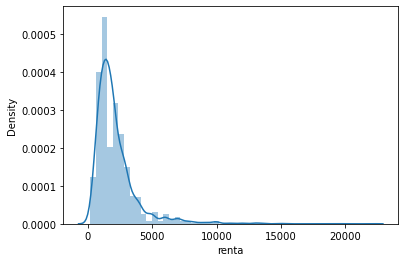

In [11]:
#Distribución de la renta

sns.distplot(datos['renta'])

### **b) Objetivos:** 
* Analizar si existe relación entre el estrato socioeconómico de la población y características de la vivienda
* Analizar el tipo de relación entre el estrato socioeconómico de la población y características de la vivienda

In [70]:
cov_matrix = datos.cov()
cov_matrix

,renta,pago_viv,edad,tot_resid,tot_hom,tot_muj,tot_hog,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor
renta,2.888867e+06,NaN,3657.916394,-79.065490,-94.596299,15.530809,-5.798773,2481.563392,470.353501,968.106793,469.466794,3606.096927
pago_viv,NaN,7.751194e+06,1937.572848,-393.319821,-126.685421,-266.634399,-8.860282,-2661.312899,437.916127,1257.737707,781.465990,6960.277780
edad,3.657916e+03,1.937573e+03,469.425226,-13.999660,-6.731711,-7.267949,-0.125755,80.187832,0.626111,3.409458,1.538319,8.555490
tot_resid,-7.906549e+01,-3.933198e+02,-13.999660,4.434551,2.170118,2.264434,0.103918,-1.571848,0.786325,0.559673,-0.146901,-0.753950
tot_hom,-9.459630e+01,-1.266854e+02,-6.731711,2.170118,1.767441,0.402677,0.052896,-1.062895,0.370222,0.216007,-0.091938,-0.524172
tot_muj,1.553081e+01,-2.666344e+02,-7.267949,2.264434,0.402677,1.861757,0.051022,-0.508953,0.416103,0.343667,-0.054963,-0.229779
tot_hog,-5.798773e+00,-8.860282e+00,-0.125755,0.103918,0.052896,0.051022,0.035333,0.080271,0.024248,0.027144,0.002418,0.008316
antiguedad,2.481563e+03,-2.661313e+03,80.187832,-1.571848,-1.062895,-0.508953,0.080271,237.706265,2.301713,5.325426,1.439443,5.557109
cuart_dorm,4.703535e+02,4.379161e+02,0.626111,0.786325,0.370222,0.416103,0.024248,2.301713,0.948444,1.126249,0.243475,1.697483
num_cuarto,9.681068e+02,1.257738e+03,3.409458,0.559673,0.216007,0.343667,0.027144,5.325426,1.126249,2.511373,0.562424,4.148895


In [74]:
correlacion=datos.corr()
correlacion

,renta,pago_viv,edad,tot_resid,tot_hom,tot_muj,tot_hog,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor
renta,1.000000,NaN,0.117729,-0.026821,-0.049723,0.007303,-0.023375,0.080213,0.337438,0.404026,0.488209,0.537954
pago_viv,NaN,1.000000,0.038727,-0.092234,-0.040441,-0.089235,-0.039770,-0.108845,0.204374,0.340857,0.510244,0.463026
edad,0.117729,0.038727,1.000000,-0.306838,-0.233706,-0.245848,-0.030878,0.237077,0.029673,0.099299,0.092409,0.073058
tot_resid,-0.026821,-0.092234,-0.306838,1.000000,0.775150,0.788085,0.262527,-0.047830,0.383417,0.167708,-0.091372,-0.066280
tot_hom,-0.049723,-0.040441,-0.233706,0.775150,1.000000,0.221985,0.211670,-0.051376,0.285946,0.102527,-0.091022,-0.072994
tot_muj,0.007303,-0.089235,-0.245848,0.788085,0.221985,1.000000,0.198932,-0.023998,0.313136,0.158935,-0.052387,-0.031161
tot_hog,-0.023375,-0.039770,-0.030878,0.262527,0.211670,0.198932,1.000000,0.027022,0.132457,0.091124,0.016616,0.008168
antiguedad,0.080213,-0.108845,0.237077,-0.047830,-0.051376,-0.023998,0.027022,1.000000,0.151675,0.216778,0.118171,0.064117
cuart_dorm,0.337438,0.204374,0.029673,0.383417,0.285946,0.313136,0.132457,0.151675,1.000000,0.729748,0.325722,0.322442
num_cuarto,0.404026,0.340857,0.099299,0.167708,0.102527,0.158935,0.091124,0.216778,0.729748,1.000000,0.464634,0.484500


<AxesSubplot:>

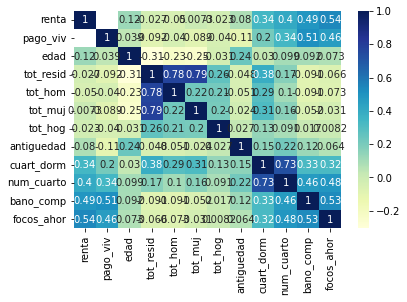

In [76]:
sns.heatmap(correlacion, annot=True,
            xticklabels=correlacion.columns,
            yticklabels=correlacion.columns,
            cmap='YlGnBu')